# **IPPR Expt 5b: Region-Splitting & Merging**

Name: Shwetha Iyer

PRN: 1032211195

Performed on: 8/3/24

Submitted on: 20/3/24

In [97]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

In [115]:
def split_merge(image, threshold):
    height, width = image.shape
    regions = [(0, 0, height, width)]
    segmented_image = np.zeros_like(image, dtype=np.uint8)

    while regions:
        new_regions = []
        for region in regions:
            y, x, h, w = region
            if h <= 1 or w <= 1:   #skip when region size is <= 1x1
                continue

            h2, w2 = h // 2, w // 2
            quadrants = [
                (y, x, h2, w2),
                (y, x + w2, h2, w - w2),
                (y + h2, x, h - h2, w2),
                (y + h2, x + w2, h - h2, w - w2)
            ]

            quadrant_means = []
            for quadrant in quadrants:
                q_y, q_x, q_h, q_w = quadrant
                quadrant_img = image[q_y: q_y + q_h, q_x: q_x + q_w]
                quadrant_mean = np.mean(quadrant_img)
                quadrant_means.append(quadrant_mean)

            #check homogeneity with adjacent regions
            homogeneity = [abs(quadrant_means[i] - quadrant_means[j]) < threshold for i in range(4) for j in range(i+1, 4)]
            if all(homogeneity):
                segmented_image[y:y+h, x:x+w] = np.mean(image[y:y+h, x:x+w]).astype(np.uint8)
            else:
                new_regions.extend(quadrants)

        regions = new_regions

    return segmented_image


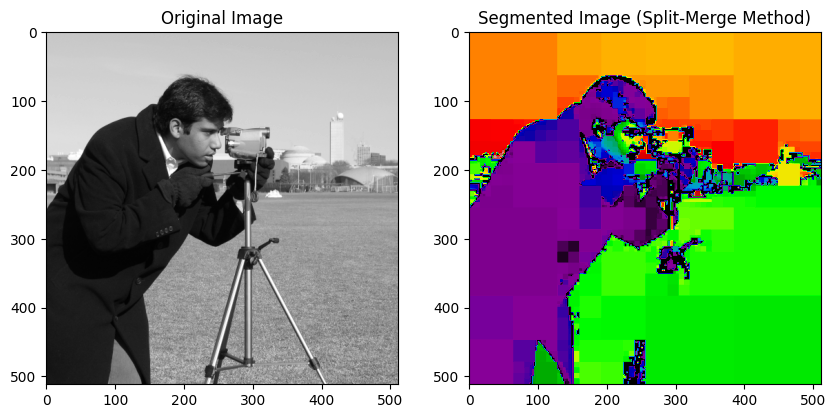

In [126]:
image = data.camera()
threshold = 15
segmented_image = split_merge(image, threshold)

fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(segmented_image, cmap='nipy_spectral')
ax[1].set_title("Segmented Image (Split-Merge Method)")
plt.show()

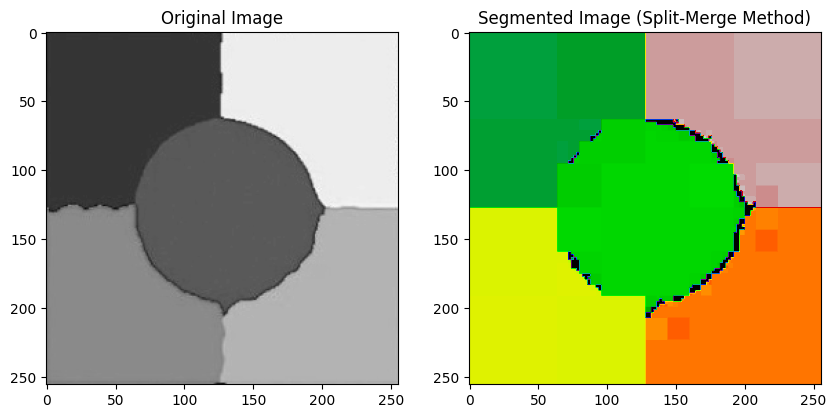

In [130]:
image = cv2.imread('/content/468_Fig_2.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (256, 256))
threshold = 10
segmented_image = split_merge(image, threshold)

fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(segmented_image, cmap='nipy_spectral')
ax[1].set_title("Segmented Image (Split-Merge Method)")
plt.show()

# ***Q. Write down the algorithm of the implemented region-splitting and merging segmentation technique.***

1. Define the criterion to be used for homogeneity.

2. Assume entire image as a single region. If the region is not homogenous, split it into 4 equal size sub-regions.

3. Calculate homogeneity for each sub-region.

4. If any sub-region is homogeneous with neighbors, merge them.

5. Repeat steps 2-4 until all regions pass the homogeneity test a.k.a no further splitting/merging is possible.
